# Deep Learning Introduction

The goal of this notebook is to see the use of deep learning in classifying complex datasets that are not linearly separable. Here we use a shallow neural network (simulating a logistic regression) and a deep three layer network and compare the results.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Shallow and Deep Networks

Let's try a synthetic dataset in a shape where the common linear classification algorithms wont be able to classify them correctly. For this purpose we will use the Scikit-Learn's helper class make_moons:

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples= 1000, noise=0.1, random_state=0)

In [11]:
X.shape

(1000, 2)

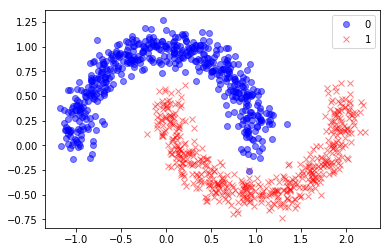

In [10]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0','1'])

### Training our model
Let's devide the data into the test and train sets and train our model:

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

#### The Shallow Model
The shallow model is the logistic regression:

In [15]:
model = Sequential()

In [16]:
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train, epochs=200, verbose=0)

In [19]:
results = model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

In [20]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


By plotting the model, we can see that we essentially have a fitted linear line, which does not accurately model our data:

In [36]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) -0.1
    amax, bmax = X.max(axis=0) +0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c  = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    plt.contourf(aa,bb,cc,cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

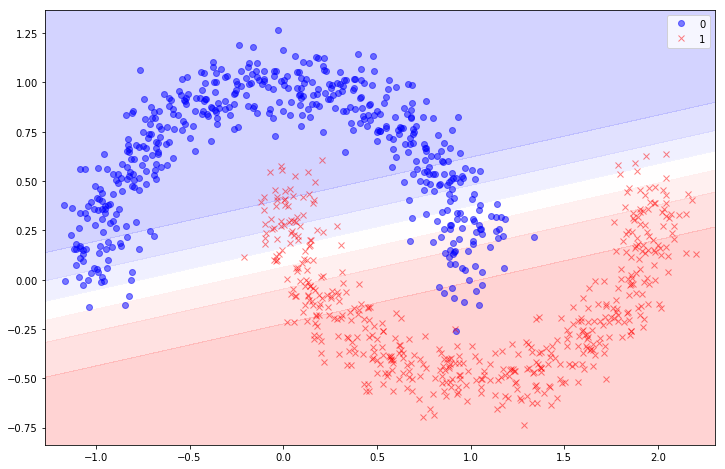

In [37]:
plot_decision_boundary(model, X, y)

### Deep Model
Now we create a deep model, including 3 layers, with nodes at the first layer, 2 nodes at the second layer and 1 node at the last layer. We use tanh activation function for the first two layers and the sigmoid function for the last layer.

On the model, we use the Adam Optimizer and the binary cross-entropy loss function.

In [53]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(X_train,y_train, epochs=100, verbose=0)

In [55]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.0030756174563430251, 1.0]

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train,y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test,y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


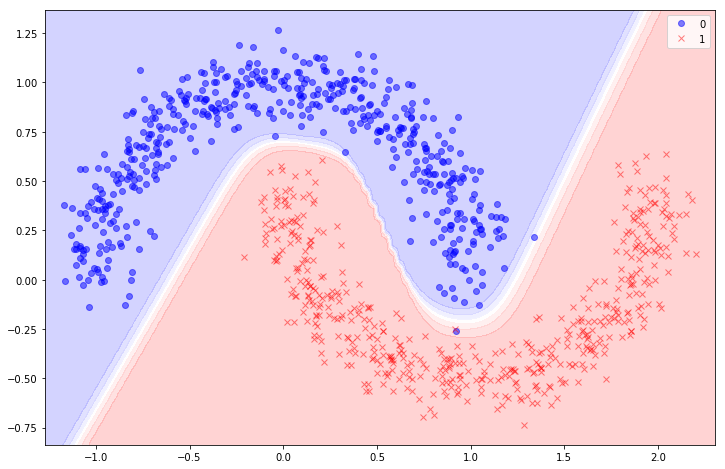

In [59]:
plot_decision_boundary(model,X,y)

Here we could achieve 100% accuracy on the test data, and from the plot we can see that the decision boundary created by this model clearly separates our data into two classes.